# Predicción del precio de las casas con regresión lineal SIMPLE

### Pasos de este estudio
1. Carga de datos
1. Desarrollo

# 1. Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lectura de datos en Python
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 2. Desarrollo

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train[['GrLivArea','SalePrice']].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


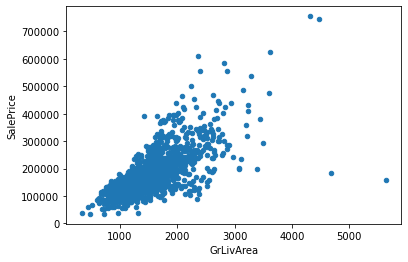

In [6]:
train.plot.scatter(x='GrLivArea',y='SalePrice')
plt.show()

In [ ]:
# pintando una línea recta sobre los datos

In [7]:
train['GrLivArea'].min()

334

In [21]:
# parametros de la recta
w = 125
b = 0

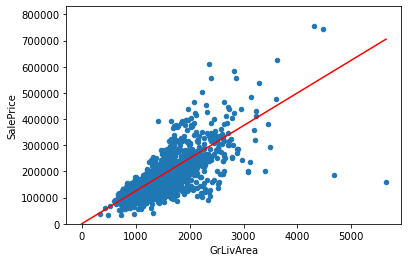

In [17]:
# puntos de la recta
x = np.linspace(0,train['GrLivArea'].max(),100)
y = w*x+b

# grafica de la recta
train.plot.scatter(x='GrLivArea',y='SalePrice')
plt.plot(x, y, '-r')
plt.ylim(0,train['SalePrice'].max()*1.1)
# plt.grid()
plt.show()

In [ ]:
# si escogemos esos parametros para el modelo cual es el error?

In [18]:
# calculo de las predicciones
train['pred'] = train['GrLivArea']*w+b

In [19]:
# calculo de la funcion de error
train['diff'] = train['pred']-train['SalePrice']
train['cuad'] = train['diff']**2
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,27562500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,564062500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,62500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,214625,74625,5568890625
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,274750,24750,612562500


In [22]:
train['cuad'].mean()

3300407822.406164

In [23]:
# grid de la funcion de error basado en m, b=0
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [24]:
def sum_error(w, train):
    b=0
    train['pred'] = train['GrLivArea']*w+b
    train['diff'] = train['pred']-train['SalePrice']
    train['cuad'] = train['diff']**2
    return(train['cuad'].mean())

In [25]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, train=train))
grid_error.head()

,w,error
0,50.000000,1.509658e+10
1,53.061224,1.404857e+10
2,56.122449,1.304878e+10
3,59.183673,1.209720e+10
4,62.244898,1.119384e+10


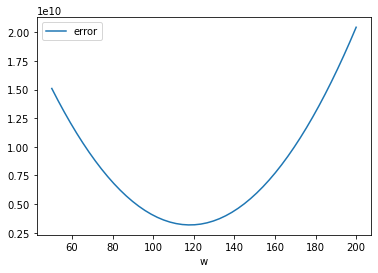

In [26]:
grid_error.plot(x='w',y='error')
plt.show()

In [27]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output
X_train = np.array(train['GrLivArea']).reshape((-1, 1))
Y_train = np.array(train['SalePrice'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [118.06909986]
